<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Principal Component Analysis**


### **Principal Component Analysis Basics**

**Principal Component Analysis**, or PCA, is a **dimensionality-reduction** method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to **trade a little accuracy for simplicity**. Because **smaller data sets are easier to explore** and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.


PCA can be described as an **unsupervised** algorithm, since it ignores class labels and its goal is to find the directions that maximize the variance in a dataset.

Give data on $d$ variables, the hope is that the data points will lie mainly in a linear subspace of dimension lower than $d$. In practice, the data will usually not lie precisely in some lower dimensional subspace. The new variables that form a new coordinate system are called **principal components** (PCs).

The first PC, $u_{1}$ is called **first principal component** and has the maximum variance, thus it accounts for the most
significant variance in the data.

The second PC, $u_{2}$ is called **second principal component** and has the second highest variance and so on until PC ud which has the minimum variance.



### **Direct Principal Component Analysis Algorithm**
* Take the whole dataset consisting of $d$-dimensional samples ignoring the class labels
* Compute the $d$-dimensional **Mean Vector**
* Compute the **Scatter matrix** (alternatively, the **Covariance matrix**) of the whole data set
* Compute **Eigenvectors** ($e_1$,$e_2$, $…$,$e_d$) and corresponding **Eigenvalues** ($λ_1,λ_2,⋯,λ_d$)
* Sort the eigenvectors by decreasing eigenvalues and **choose $p$ eigenvectors with the largest eigenvalues** to form a $d×p$ dimensional matrix $U$(where every column represents an eigenvector)
* Use this $d×p$ eigenvector matrix to transform the samples onto the new subspace.

$$
U^{T}_{p\times d} \cdot 
(X=\begin{bmatrix}
x_{1}    \\
x_{2}    \\
\vdots        \\
x_{n}    \\
\end{bmatrix}_{\ d×n})\longrightarrow 
Y=\begin{bmatrix}
y_{1}    \\
y_{2}    \\
\vdots        \\
y_{p}    \\
\end{bmatrix}_{\ p\times n}
$$

A unique solution can be obtained by finding the **singular value decomposition** of $X$. For each rank $p$, $U$ consists of the first $p$ columns of $U$.

$$X=U\Sigma V^{T}$$

The columns of $U$ in the SVD contain the eigenvectors of $XX^{T}$

### **Dataset Initialization**

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
np.random.seed(0)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

In [103]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

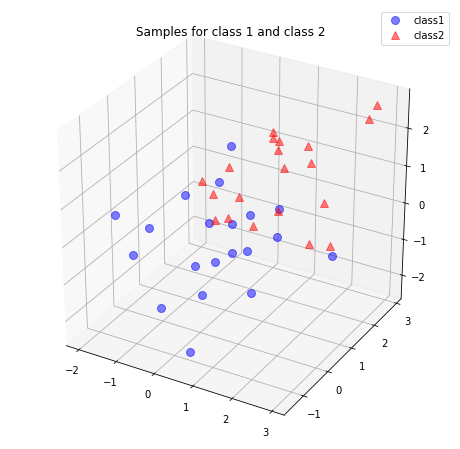

In [104]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')  
ax.plot(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], '^', markersize=8, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend()

plt.show()

In [105]:
x = np.concatenate((class1_sample, class2_sample), axis=0)
x.shape

(40, 3)

### **Implementing Principal Component Analysis from scratch**

In [106]:
class Principal_Component_Analysis:
    def __init__(self, n_components=2):
        self.n_components = n_components
    
    def fit(self, x):
        # computing the mean vector
        mean_vector = np.mean(x,axis=0)

        #scatter_matrix = np.zeros((3,3))
        # for i in range(x.shape[0]):
        #    scatter_matrix += (x[i,:].reshape(3,1) - mean_vector).dot((x[i,:].reshape(3,1) - mean_vector).T)
        # computing the covariance matrix
        cov_mat = np.cov([x[:,0], x[:,1], x[:,2]])

        # eigenvectors and eigenvalues for the from the covariance matrix
        eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

        # Make a list of (eigenvalue, eigenvector) tuples
        eig_pairs = [[np.abs(eig_val_cov[i]), eig_vec_cov[:,i]] for i in range(len(eig_val_cov))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        eig_pairs.sort(key=lambda x: x[0], reverse=True)

        # Produce matrix U
        matrix_U = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))

        # Transforming the samples onto the new subspace
        transformed = matrix_U.T.dot(x.T)

        self.plot_curve(transformed)

        return self
    
    def plot_curve(self, transformed):
        plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
        plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.xlim([-4,4])
        plt.ylim([-4,4])
        plt.legend()
        plt.title('Transformed samples via Principal Component Analysis')
        plt.show()

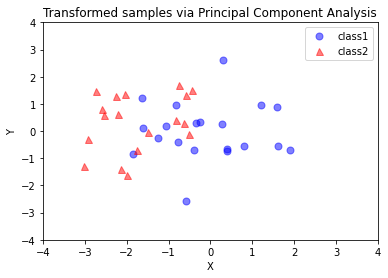

In [107]:
# Model initialization
PCA_Model = Principal_Component_Analysis(n_components=2)
# Fit the data(train the model)
PCA_Model.fit(x)

### **Implementing Principal Component Analysis from sklearn**

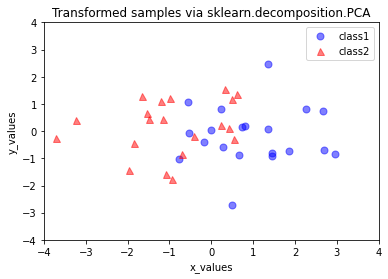

In [108]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(x)
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

In [109]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Principal_Component_Analysis.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_Principal_Component_Analysis.ipynb to html
[NbConvertApp] Writing 396088 bytes to ML_Algorithms_Principal_Component_Analysis.html
